You can read about the bikesharing dataset here https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset. This dataset records the number bikes rented in Capital bikeshare system in Washington D.C. and many other weather and environmental attributes (this is the same dataset you have used in Assignment #1 and #2).

a) Using the dataset (use hour.csv file), your task will be to create a support vector regression for predicting the demand of bikesharing using scikit-learn. Evaluate your model’s performance by splitting the dataset into training and test datasets. In your report, briefly describe how you approached the problem and what interesting results you obtained.

b) Next use at least two different kernel functions to train your model.

c) Plot the accuracy levels over training and test data over different approaches.

In [11]:
#import the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("default")
hour = pd.read_csv('hour.csv')

In [2]:
#Define Target Variable
y = np.array(hour.cnt)

In [3]:
#Drop unnecessary variables
hour.drop(['cnt','dteday','instant','casual','registered'],1,inplace=True)

In [4]:
#Define input values
X = hour.values

In [5]:
#Split the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=66, shuffle=True)

In [6]:
#Develop the model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=10)
regressor.fit(X_train, y_train)

SVR(C=10)

In [7]:
#Get the scores
regressor.score(X_train, y_train)

0.47921228104751346

In [8]:
regressor.score(X_test, y_test)

0.4927487857199119

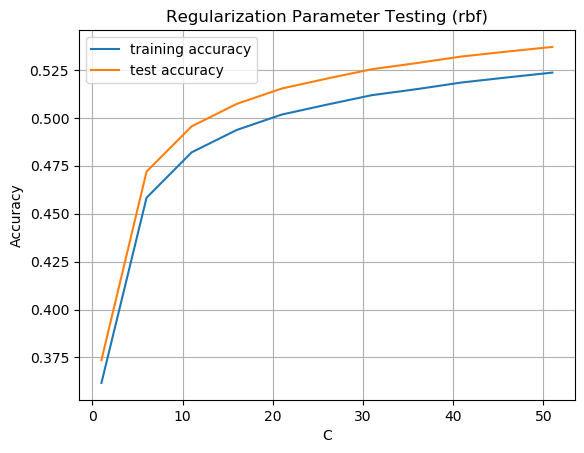

In [12]:
#Check score with different C values
training_accuracy = []
test_accuracy = []

# try Regularization Parameter from 1 to 50
C_settings = range(1,55,5)

for R in C_settings:
    # build the model
    regressor = SVR(kernel = 'rbf',C=R)
    regressor.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(regressor.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(regressor.score(X_test, y_test))  
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()
plt.grid()
plt.title("Regularization Parameter Testing (rbf)");

In [52]:
#Develop another model
regressor = SVR(kernel = 'linear',C=10)
regressor.fit(X_train, y_train)

SVR(C=10, kernel='linear')

In [53]:
#Get the scores
regressor.score(X_train, y_train)

0.3359255498255467

In [54]:
regressor.score(X_test, y_test)

0.3480968773966422

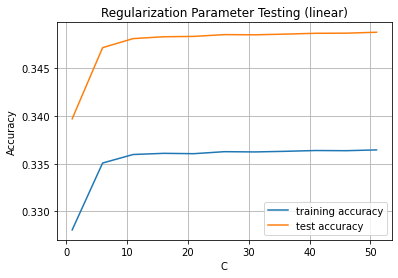

In [55]:
#Check score with different C values
training_accuracy = []
test_accuracy = []

# try Regularization Parameter from 1 to 50
C_settings = range(1,55,5)

for R in C_settings:
    # build the model
    regressor = SVR(kernel = 'linear',C=R)
    regressor.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(regressor.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(regressor.score(X_test, y_test))  
plt.plot(C_settings, training_accuracy, label="training accuracy");
plt.plot(C_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("C");
plt.legend();
plt.grid();
plt.title("Regularization Parameter Testing (linear)");

In [56]:
#Develop another model
regressor = SVR(kernel = 'poly',C=10)
regressor.fit(X_train, y_train)

SVR(C=10, kernel='poly')

In [57]:
#Get the scores
regressor.score(X_train, y_train)

0.36966873999776373

In [58]:
regressor.score(X_test, y_test)

0.37636756288706175

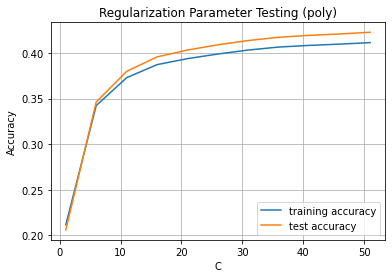

In [59]:
#Check score with different C values
training_accuracy = []
test_accuracy = []

# try Regularization Parameter from 1 to 50
C_settings = range(1,55,5)

for R in C_settings:
    # build the model
    regressor = SVR(kernel = 'poly',C=R)
    regressor.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(regressor.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(regressor.score(X_test, y_test))  
plt.plot(C_settings, training_accuracy, label="training accuracy");
plt.plot(C_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("C");
plt.legend();
plt.grid();
plt.title("Regularization Parameter Testing (poly)");

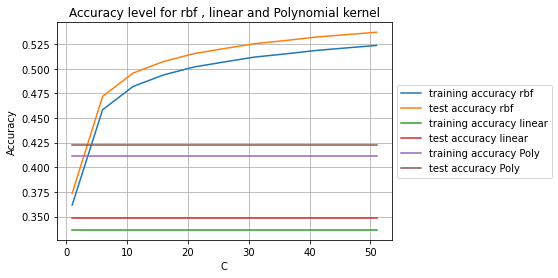

In [60]:
#Plotting accuracy level of three approaches
training_accuracyl = []
test_accuracyl = []
training_accuracyp = []
test_accuracyp = []
training_accuracyr = []
test_accuracyr  = []
# try C from 1 to 50
C_settings = range(1,55,5)
C_settings2 = range(1,55,5)
C_settings3 = range(1,55,5)

for C_setting in C_settings:
    # build the model
    regressor = SVR(kernel = 'rbf',C = C_setting)
    regressor.fit(X_train, y_train)
    # record training set accuracy
    training_accuracyr.append(regressor.score(X_train, y_train))
    # record generalization accuracy
    test_accuracyr.append(regressor.score(X_test, y_test))  
plt.plot(C_settings, training_accuracyr, label="training accuracy rbf");
plt.plot(C_settings, test_accuracyr, label="test accuracy rbf");

for C_setting2 in C_settings2:
    # build the model
    linear = SVR(kernel = 'linear',C = C_setting)
    linear.fit(X_train, y_train)
    # record training set accuracy
    training_accuracyl.append(linear.score(X_train, y_train))
    # record generalization accuracy
    test_accuracyl.append(linear.score(X_test, y_test))
plt.plot(C_settings2, training_accuracyl, label="training accuracy linear");
plt.plot(C_settings2, test_accuracyl, label="test accuracy linear");   

for C_setting3 in C_settings3:
    # build the model
    poly = SVR(kernel = 'poly',degree=3,C = C_setting)
    poly.fit(X_train, y_train)
    # record training set accuracy
    training_accuracyp.append(poly.score(X_train, y_train))
    # record generalization accuracy
    test_accuracyp.append(poly.score(X_test, y_test))
plt.plot(C_settings3, training_accuracyp, label="training accuracy Poly");
plt.plot(C_settings3, test_accuracyp, label="test accuracy Poly");
plt.ylabel("Accuracy");
plt.xlabel("C");
plt.title("Accuracy level for rbf , linear and Polynomial kernel")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.grid();

In [10]:
C_settings = range(1,55,5)
type(C_settings)

range